# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


### Load the dataset 

In [2]:
# Load the dataset 
sales_data = pd.read_csv('data/sales_data_unclean.csv')

# Step 1: Explore the data
print("Initial Dataset Info:")
print(sales_data.info())

print("\nInitial Dataset Summary:")
print(sales_data.describe())


Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  840 non-null    object 
 1   Product   790 non-null    object 
 2   Region    1000 non-null   object 
 3   Date      954 non-null    object 
 4   Sales     906 non-null    float64
 5   Quantity  955 non-null    float64
dtypes: float64(2), object(4)
memory usage: 47.0+ KB
None

Initial Dataset Summary:
            Sales    Quantity
count  906.000000  955.000000
mean   232.249216    5.045026
std    158.599770    2.618885
min    -49.870000    1.000000
25%     93.235000    3.000000
50%    237.610000    5.000000
75%    367.510000    7.000000
max    498.760000    9.000000


### Check for missing value

Missing Values Count:
Category    160
Product     210
Region        0
Date         46
Sales        94
Quantity     45
dtype: int64


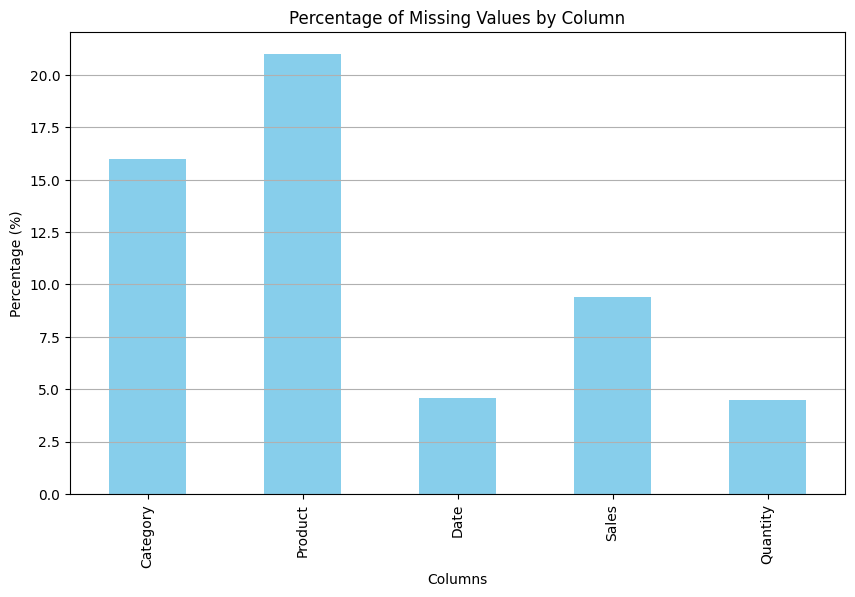

In [3]:
missing_values = sales_data.isnull().sum()
print("Missing Values Count:")
print(missing_values)

missing_values = missing_values[missing_values > 0]  # Filter only columns with missing values
missing_values_percentage = (missing_values / len(sales_data)) * 100

plt.figure(figsize=(10, 6))
missing_values_percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Percentage (%)')
plt.grid(axis='y')
plt.show()

### Handle Missing Values

In [4]:
# Handle Missing Values

# Fill missing 'Category' with 'Unknown'
sales_data['Category'] = sales_data['Category'].fillna('Unknown')

# Fill missing 'Product' with 'Unknown Product'
sales_data['Product'] = sales_data['Product'].fillna('Unknown Product')

# Drop rows where 'Date' is missing (critical for time-based analysis)
sales_data = sales_data.dropna(subset=['Date'])

# Fill missing 'Sales' with 0 (assume no sales were made)
sales_data['Sales'] = sales_data['Sales'].fillna(0)

# Fill missing 'Quantity' with median value
sales_data['Quantity'] = sales_data['Quantity'].fillna(sales_data['Quantity'].median())

In [5]:
print(sales_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 954 entries, 0 to 999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  954 non-null    object 
 1   Product   954 non-null    object 
 2   Region    954 non-null    object 
 3   Date      954 non-null    object 
 4   Sales     954 non-null    float64
 5   Quantity  954 non-null    float64
dtypes: float64(2), object(4)
memory usage: 52.2+ KB
None


### Identify inconsistencies

In [6]:
# Step 1: Inspect unique values and their counts
print("Unique Values in 'Region':")
print(sales_data['Region'].value_counts())

# Step 2: Identify inconsistencies
# Grouping unique values that should be standardized
inconsistent_regions = sales_data['Region'].str.lower().value_counts()
print("\nGrouped Regions (Case Insensitivity):")
print(inconsistent_regions)

Unique Values in 'Region':
Region
east       180
East       160
South      160
Central    156
North      151
West       147
Name: count, dtype: int64

Grouped Regions (Case Insensitivity):
Region
east       340
south      160
central    156
north      151
west       147
Name: count, dtype: int64


### Fix Inconsistent Data

In [7]:
# Step 3: Fix Inconsistent Data
# Standardize region names to title case
sales_data['Region'] = sales_data['Region'].str.title()

# Replace invalid region values with 'Unknown Region'
valid_regions = ['East', 'West', 'North', 'South', 'Central']
sales_data['Region'] = sales_data['Region'].where(sales_data['Region'].isin(valid_regions), 'Unknown Region')


In [8]:
sales_data['Region'].str.lower().value_counts()

Region
east       340
south      160
central    156
north      151
west       147
Name: count, dtype: int64

### Visualize Outliers

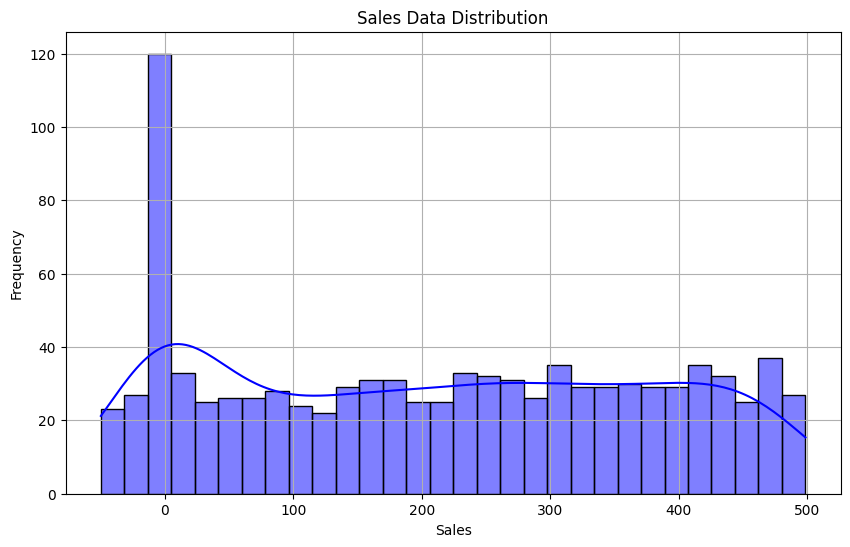

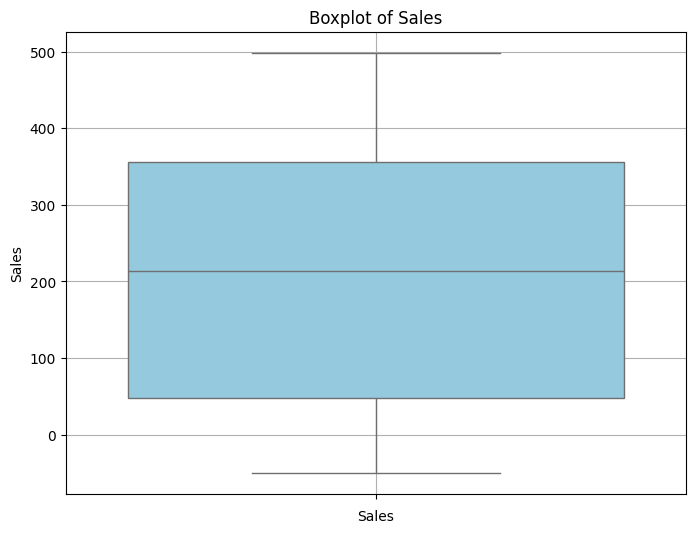

In [10]:
# Step 1: Visualize Sales Distribution with a Histogram
plt.figure(figsize=(10, 6))
sns.histplot(sales_data['Sales'], kde=True, bins=30, color='blue')
plt.title('Sales Data Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Step 2: Visualize Outliers in Sales Data with a Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=sales_data, y='Sales', color='skyblue')
plt.title('Boxplot of Sales')
plt.xlabel('Sales')
plt.grid(True)
plt.show()

### Handle Outliers

In [9]:
# Remove rows where 'Sales' is negative (assuming sales cannot be negative)
sales_data = sales_data[sales_data['Sales'] > 0]


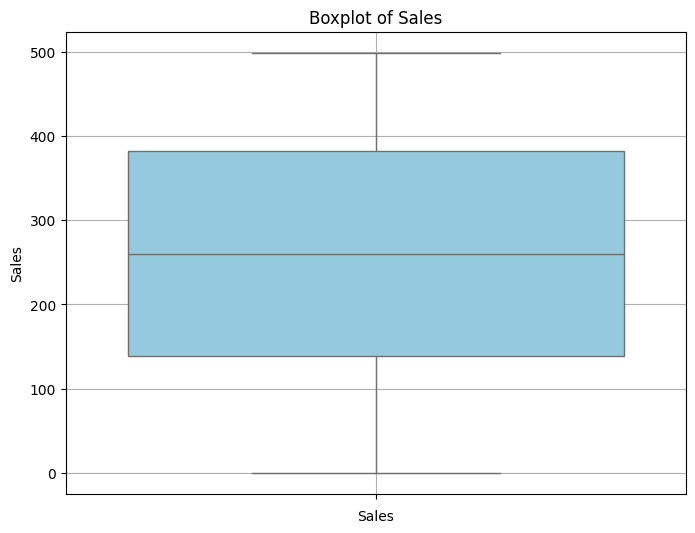

In [10]:
# Visualize Outliers in Sales Data with a Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=sales_data, y='Sales', color='skyblue')
plt.title('Boxplot of Sales')
plt.xlabel('Sales')
plt.grid(True)
plt.show()

In [11]:
print(sales_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 791 entries, 0 to 999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  791 non-null    object 
 1   Product   791 non-null    object 
 2   Region    791 non-null    object 
 3   Date      791 non-null    object 
 4   Sales     791 non-null    float64
 5   Quantity  791 non-null    float64
dtypes: float64(2), object(4)
memory usage: 43.3+ KB
None


In [12]:
print("Original 'Date' column format:")
print(sales_data['Date'].head())

# Identify invalid date entries
invalid_dates = sales_data[~sales_data['Date'].apply(pd.to_datetime, errors='coerce').notna()]

print("\nInvalid 'Date' entries:")
print(invalid_dates)

Original 'Date' column format:
0    2022-04-13
1    2023-12-02
3    2023-01-08
5    2022-12-10
6    2023-01-21
Name: Date, dtype: object

Invalid 'Date' entries:
Empty DataFrame
Columns: [Category, Product, Region, Date, Sales, Quantity]
Index: []


In [13]:
# Step 3: Check for any null or non-datetime values after conversion attempt
sales_data['Date'] = pd.to_datetime(sales_data['Date'], errors='coerce')  # Converts valid entries, replaces invalid with NaT

# Step 4: Inspect if any corrections are needed (null values after conversion)
missing_dates = sales_data[sales_data['Date'].isna()]
print("\nRows with invalid or missing 'Date' after conversion:")
print(missing_dates)


Rows with invalid or missing 'Date' after conversion:
Empty DataFrame
Columns: [Category, Product, Region, Date, Sales, Quantity]
Index: []


In [14]:
print(sales_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 791 entries, 0 to 999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Category  791 non-null    object        
 1   Product   791 non-null    object        
 2   Region    791 non-null    object        
 3   Date      791 non-null    datetime64[ns]
 4   Sales     791 non-null    float64       
 5   Quantity  791 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 43.3+ KB
None


In [15]:
# Step 5: Add a new 'Month' column for trend analysis
sales_data['Month'] = sales_data['Date'].dt.to_period('M')


In [16]:

# Step 6: Validate Data
print("\nCleaned Dataset Info:")
print(sales_data.info())

print("\nCleaned Dataset Summary:")
print(sales_data.describe())



Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 791 entries, 0 to 999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Category  791 non-null    object        
 1   Product   791 non-null    object        
 2   Region    791 non-null    object        
 3   Date      791 non-null    datetime64[ns]
 4   Sales     791 non-null    float64       
 5   Quantity  791 non-null    float64       
 6   Month     791 non-null    period[M]     
dtypes: datetime64[ns](1), float64(2), object(3), period[M](1)
memory usage: 49.4+ KB
None

Cleaned Dataset Summary:
                                Date       Sales    Quantity
count                            791  791.000000  791.000000
mean   2023-01-02 03:11:09.026548480  256.563097    5.002528
min              2022-01-01 00:00:00    0.370000    1.000000
25%              2022-07-03 12:00:00  138.460000    3.000000
50%              2023-01-08 00:00:00  260.

**Save Cleaned Data**

In [17]:
# Step 7: Save Cleaned Data
sales_data.to_csv('data/sales_data_cleaned.csv', index=False)

print("\nCleaned data saved to 'sales_data_cleaned.csv'")


Cleaned data saved to 'sales_data_cleaned.csv'


## Explore the Data for analysis

In [18]:
sales_data

,Category,Product,Region,Date,Sales,Quantity,Month
0,Home Decor,Cushion,East,2022-04-13,388.10,8.0,2022-04
1,Clothing,Jacket,East,2023-12-02,278.27,3.0,2023-12
3,Clothing,Jeans,West,2023-01-08,280.61,8.0,2023-01
5,Sports,Football,South,2022-12-10,407.84,6.0,2022-12
6,Home Decor,Cushion,South,2023-01-21,50.00,5.0,2023-01
...,...,...,...,...,...,...,...
994,Electronics,Laptop,South,2023-01-15,328.62,7.0,2023-01
995,Electronics,Mobile,East,2022-10-17,41.77,5.0,2022-10
997,Books,Fiction,South,2023-02-25,439.55,1.0,2023-02
998,Clothing,Jeans,South,2023-07-13,34.95,2.0,2023-07


### Total Sales Over Time (Monthly)

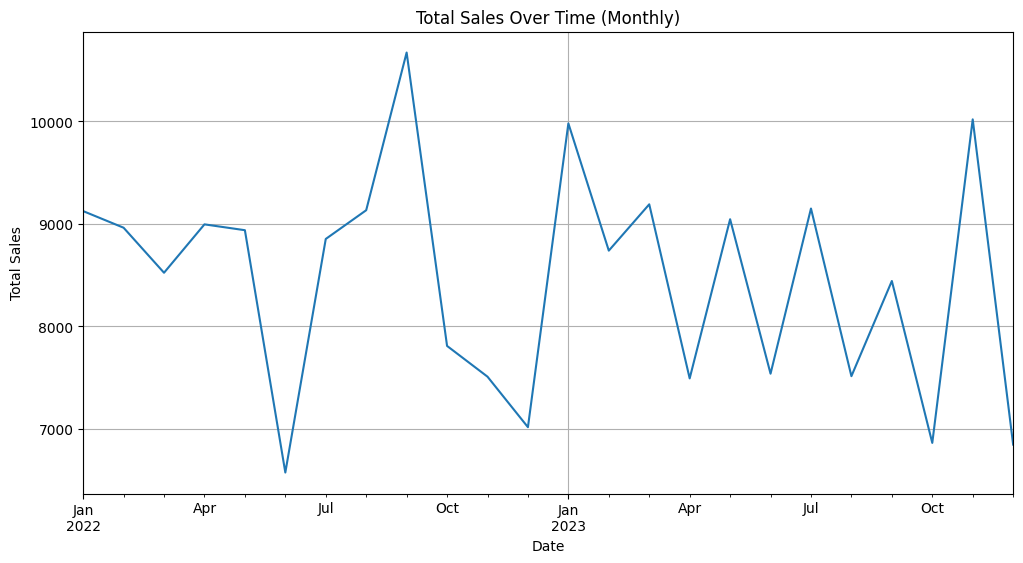

In [19]:
# Total Sales Over Time (Monthly)
monthly_sales = sales_data.resample('ME', on='Date')['Sales'].sum()

# Plotting Total Sales Over Time (Monthly)
plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Total Sales Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


### Total Sales Over Time (Quarterly)

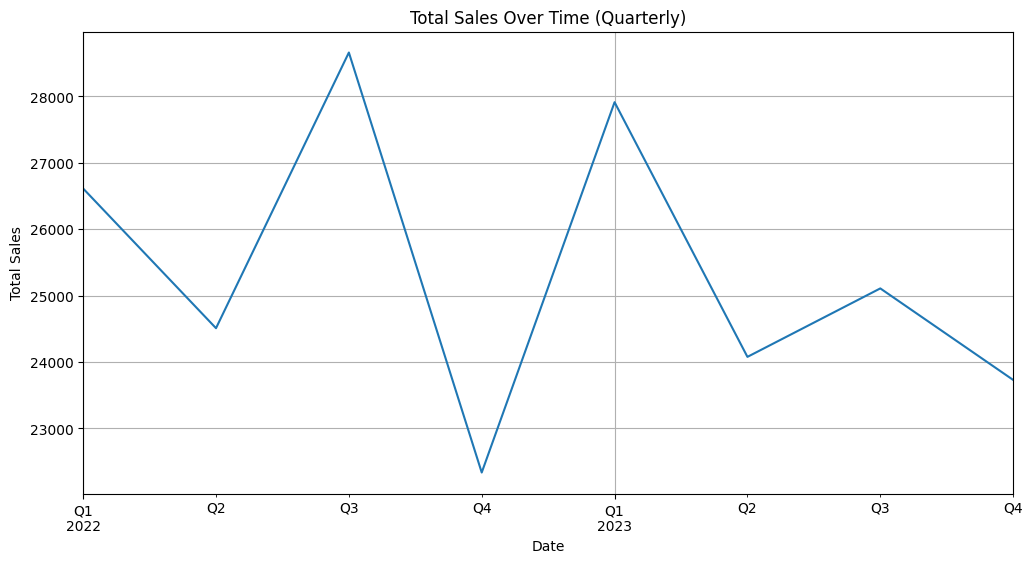

In [20]:
# Total Sales Over Time (Quarterly)
quarterly_sales = sales_data.resample('QE', on='Date')['Sales'].sum()

# Plotting Total Sales Over Time (Quarterly)
plt.figure(figsize=(12, 6))
quarterly_sales.plot()
plt.title('Total Sales Over Time (Quarterly)')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


### Sales Distribution Across Regions

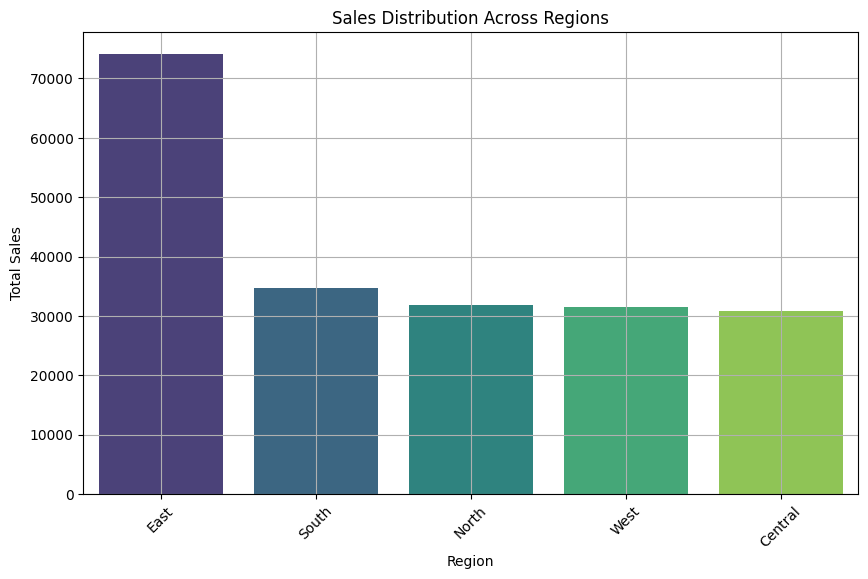

In [21]:
#Sales Distribution Across Regions
region_sales = sales_data.groupby('Region')['Sales'].sum().sort_values(ascending=False)

# Plotting Sales Distribution Across Regions
plt.figure(figsize=(10, 6))
sns.barplot(x=region_sales.index, y=region_sales.values, hue=region_sales.index, palette='viridis', legend=False)
plt.title('Sales Distribution Across Regions')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### Sales vs. Quantity Relationship (Line Plot)

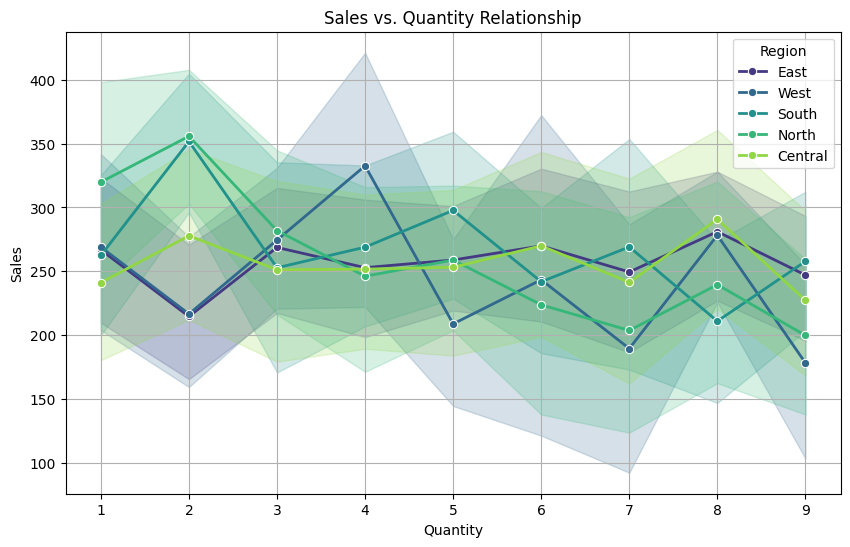

In [22]:
# Sales vs. Quantity Relationship (Line Plot)
plt.figure(figsize=(10, 6))

# We will first group by Quantity to create a smooth line plot
sns.lineplot(data=sales_data, x='Quantity', y='Sales', hue='Region', palette='viridis', marker='o', linewidth=2)

# Adding titles and labels
plt.title('Sales vs. Quantity Relationship')
plt.xlabel('Quantity')
plt.ylabel('Sales')

# Display the grid and the legend
plt.grid(True)
plt.legend(title='Region', loc='upper right')

# Show the plot
plt.show()


### Line Plot: Total Sales Over Time

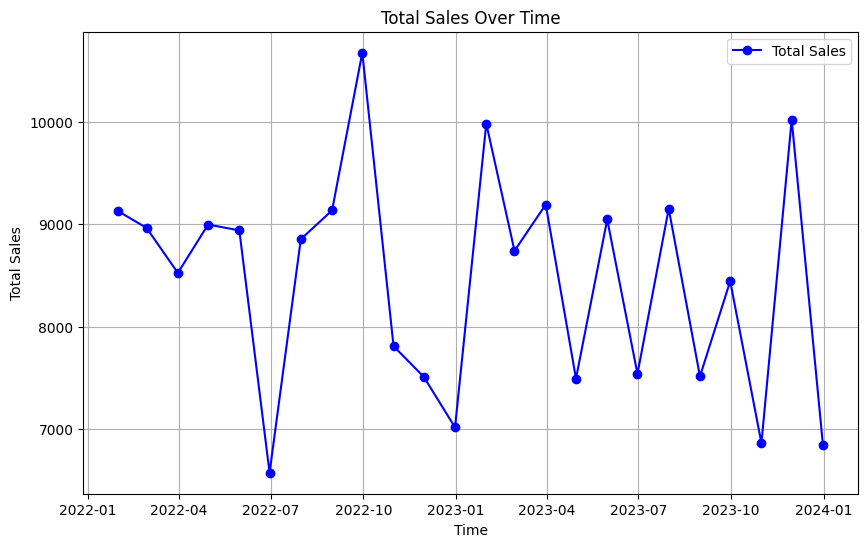

In [23]:
# Line Plot: Total Sales Over Time
sales_over_time = sales_data.resample('ME', on='Date')['Sales'].sum()

plt.figure(figsize=(10, 6))
plt.plot(sales_over_time.index, sales_over_time.values, marker='o', color='blue', label='Total Sales')
plt.title('Total Sales Over Time')
plt.xlabel('Time')
plt.ylabel('Total Sales')
plt.grid(True)
plt.legend()
plt.show()


### Pie Chart: Sales Share of Different Regions

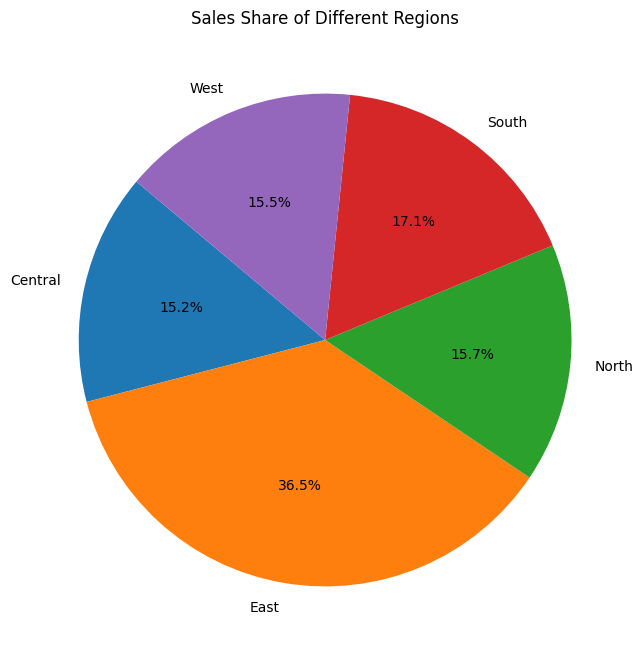

In [24]:
# Pie Chart: Sales Share of Different Regions
region_sales = sales_data.groupby('Region')['Sales'].sum()
colors = plt.get_cmap('tab10').colors[:len(region_sales)]

plt.figure(figsize=(8, 8))
plt.pie(region_sales.values, labels=region_sales.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Sales Share of Different Regions')
plt.show()


### Example data: Total Sales by Product Category

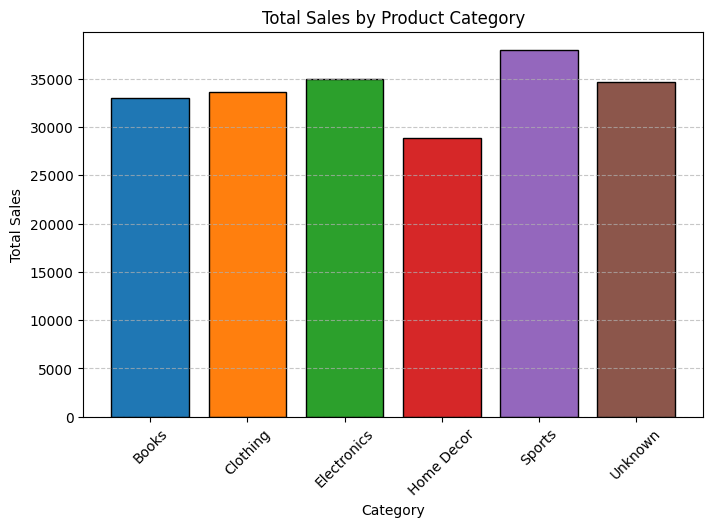

In [25]:
# Example data: Total Sales by Product Category
category_sales = sales_data.groupby('Category')['Sales'].sum()
colors = plt.get_cmap('tab10').colors[:len(category_sales)]
# Simple Bar Plot
plt.figure(figsize=(8, 5))
plt.bar(category_sales.index, category_sales.values, color=colors, edgecolor='black')
plt.title('Total Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
